# Tutorial 3: Determining local stability

Let's get more familiar with determining local stability using logistic population growth.

### Logistic growth in discrete time

A reminder that the recursion is

$$
n(t+1) = \left(1 + r\left(1-\frac{n(t)}{K}\right)\right)n(t),
$$

where $r$ is the intrinsic growth rate and $K$ the carrying capacity.

We can define the right-hand side as $f(n)$ for convenience,

$$
f(n) = n \left(1 + r\left(1 - \frac{n}{K}\right)\right).
$$

We first take the derivative of $f$ with respect to $n$

$$
f'(n) = 1 + r - 2 r \frac{n}{K}
$$

Then we plug in the equilirbium value of interest, $n=K$

$$
\begin{aligned}
f'(K) &= 1 + r - 2 r \\
&= 1 - r
\end{aligned}
$$

This will be negative when $r > 1$, creating oscillations.

The equilibrium will be stable when $-1 < 1 - r < 1 \implies 0 < r < 2$.

This is consistent with what we've seen in cob-web plots, which you can verify by playing with the parameter values at the top of the code below.

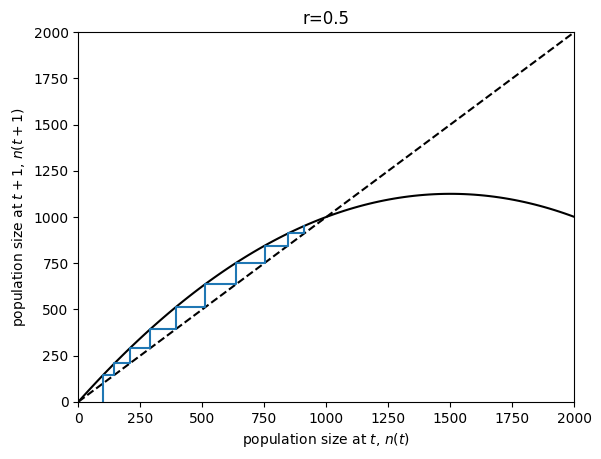

In [4]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

# parameter values
r = 0.5 #growth rate
K = 1000 #carrying capacity

# Write out sympy equation
n = symbols('n') #define our variable n(t)
f = n*(1 + r*(1 - n/K)) #the recursion equation

# Compute function over a set of points in [0,2K] by 'lambdifying' sympy equation
x = np.linspace(0,2*K,100)
fy = lambdify(n, f)(x)

# Build function for generating figure
def plot_n(x,fy):
    fig, ax = plt.subplots()
    ax.plot(x, fy, color='black') #n_{t+1} as function of n_t
    ax.plot(x, x, color='black', linestyle='--') #1:1 line for reference
    ax.set_xlim(0,2*K)
    ax.set_ylim(0,2*K)
    ax.set_xlabel("population size at $t$, $n(t)$")
    ax.set_ylabel("population size at $t+1$, $n(t+1)$")
    return ax

# Plot figure
ax = plot_n(x,fy)

# make generator
def nt(n0, r, K, max=oo):
    t, nnow, nnext = 0, n0, 0 #initial conditions
    while t < max:
        yield nnow, nnext #current value of n(t) and n(t+1)
        nnext = nnow*(1 + r*(1 - nnow/K)) #update n(t+1)
        yield nnow, nnext #current value of n(t) and n(t+1)
        nnow = nnext #update n(t)
        t += 1 #update t

# Initialize generator
nts = nt(n0=100, r=r, K=K, max=10)

# Compute x,y pairs by iterating through generator
ns = np.array([[x,y] for x,y in nts])

# Plot 'cobwebs'
ax.plot(ns[:,0], ns[:,1])

ax.set_title('r=%s'%r)
    
plt.show()

## Problem

In continuous time the logistic growth model is 

$$
\frac{\mathrm{d}n}{\mathrm{d}t} = n r \left(1 - \frac{n}{K}\right).
$$

What are the equilibria and when are they stable? How do these answers differ in continuous vs discrete time?